## MIS780 Advanced AI For Business - Assignment 1 - T2 2023

**Student Name:** Quoc Viet Dang

**Student ID:** s221541402

## Table of Content

1. [Executive Summary](#cell_executivesummary)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)


5. [Practical Implication](#cell_PracticalImplication)


<a id = "cell_executivesummary"></a>
### <font color="red">1. Executive Summary </font>  

Problem Definition:

The aim of this project is to analyze and understand the customer sentiment and preferences for various airlines. By leveraging data from Twitter and applying machine learning techniques, the project aims to identify key areas of improvement for airlines and suggest strategies to enhance customer satisfaction.

Business Benefit:

The project's primary benefit is to provide airlines with actionable insights to improve their services and customer experiences. By understanding customer sentiments and identifying specific pain points, airlines can address issues proactively, leading to higher customer satisfaction and loyalty. This, in turn, can contribute to positive brand perception, increased customer retention, and a competitive edge in the market.

Proposed Approaches:

1. Sentiment Analysis: Utilizing Natural Language Processing (NLP) techniques, sentiment analysis is performed on customer tweets to classify sentiments as positive, negative, or neutral. This approach helps airlines understand the overall sentiment of their customers and identify areas for improvement.

2. Topic Modelling: The project employs topic modelling to extract key topics from customer comments. This analysis assists in identifying specific areas where airlines need to focus their efforts to address customer concerns and improve services.

Major Findings:

- Twitter Analysis: The study reveals that most customers of Delta, United, American, and US Airways are from New York, while Southwest and Virgin America customers are primarily from Texas and California, respectively. This finding suggests airlines should tailor their Twitter strategies to engage customers in specific regions effectively.

- Customer Service Issues: The analysis shows that the most prevalent negative reason among customers is related to customer service issues, followed by late flights. This finding underscores the importance for each airline to investigate their customer service department and address any underlying issues to enhance customer satisfaction.

- Model Performance: SVM and Multinomial Naive Bayes models demonstrated high accuracy in classifying sentiments. However, their kappa scores indicate that predictions are only slightly better than chance. This emphasizes the need for further improvements in model performance to ensure more reliable predictions.

- Positive Comments Analysis: The Lexicon Based Approach reveals that American Airline received more positive comments compared to negative ones. Conversely, United Airline had a higher percentage of negative comments. Understanding these patterns can help airlines leverage positive feedback and address issues highlighted in negative comments.

- Topic modelling: The analysis revealed three key findings for the airline brands. Virgin American ranked highest in positive sentiment topics related to flights, customers, and service, presenting an opportunity to strengthen customer relationships. Delta faced challenges in areas like help, luggage, and seats, highlighting the need for improvements to enhance customer satisfaction. American Airline excelled in topics concerning planes, gates, and agents, positioning them well to attract and retain customers with a smooth travel experience. Addressing these findings can lead to enhanced customer experiences and improved competitiveness in the market.

Overall, the major findings of this project provide airlines with actionable insights to address customer needs, improve services, and enhance the overall customer experience. By implementing the proposed approaches and acting on the findings, airlines can drive customer satisfaction, foster loyalty, and strengthen their position in the competitive market.

<a id = "cell_exploration"></a>
### <font color="red">2. Data Exploration </font>  
**Aim:** To demonstrate your understanding of data and report any insights emerging from data analysis

_Process and explore the characteristics of the attributes the provided data set._




**Import the data**

In [133]:
#import library and connect to google drive
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wordcloud

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
# Import file
#define the folder path where the files are located
file_path = '/content/drive/MyDrive/Colab Notebooks/MIS780-Advanced AI/Assignment/'
#list all files in the folder
file_list = os.listdir(file_path)

#find the file with the name customer
customer_file_name = 'A1 Data Set.csv'

if customer_file_name in file_list:
  customer_file_path = file_path + customer_file_name

  #r2ead pandas
  data = pd.read_csv(customer_file_path)
else:
  print('there is no such file')

df = data.copy()

In [135]:
#check first 5 rows of the data
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [136]:
#checking info our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

The dataset has total 14639 rows, with 15 columns


In [137]:
#checking unique values
print(df.nunique(), df['airline'].unique())

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64 ['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']


The tweet_ID has the most number of unique value, however, they are not all unique; thus, we cannot treat that column as Index.
There are 6 different types of airlines in our dataset, including: 'Virgin America' 'United' 'Southwest' 'Delta' 'US Airways', and 'American'

In [138]:
#check null values in our data
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

There are a significant amount of null values in columns "airline_sentiment_gold", "negativereason_gold", and "tweet_coord".

Next step, we are going to dive deep into the dataset and doing some data cleaning.

---


###Data cleaning

In [139]:
#check the percentage of data missing
print("Percentage null or na values in df1")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df1


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

airline_sentiment_gold, negativereason_gold, and tweet_coord have a huge amount of missing data; thus, those columns will be dropped.

In [140]:
#drop unnecessary columns
df.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis = 1, inplace = True)

####**Rank the popularity of airlines based on the number of tweets posted for each airline.**

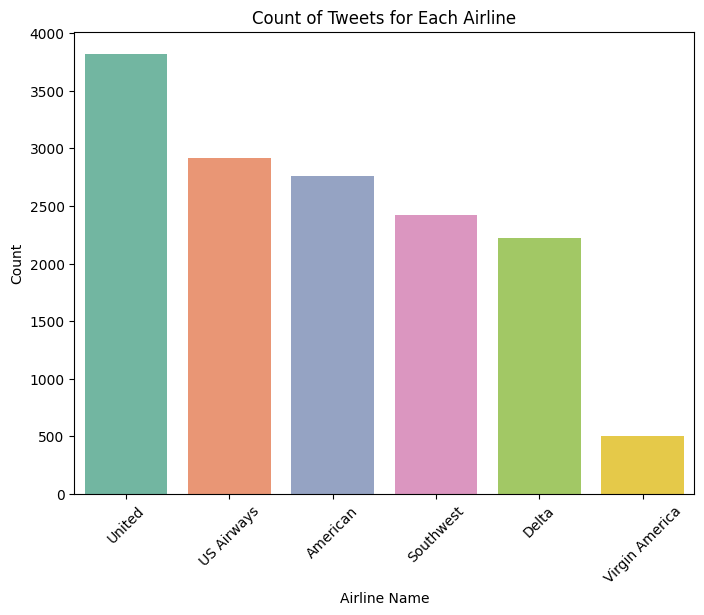

In [141]:
# Group the data by "airline" and count the number of tweets for each airline
count_tweet = df.groupby('airline').size().sort_values(ascending = False)
count_tweet = count_tweet.reset_index(name = 'count')

# Get the unique airlines and their corresponding colors
air_color = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Set the figure size
plt.figure(figsize = (8, 6))

# Use Seaborn's barplot to create the bar chart
sns.barplot(data = count_tweet, x= 'airline', y='count', palette= "Set2")

# Set labels and title
plt.xlabel('Airline Name')
plt.ylabel('Count')
plt.title('Count of Tweets for Each Airline')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


United is the airline with most number of tweet, the last position is for Virgin America.

---

####**Identify the most popular states where customers are located for each airline.**


To get the state where customers are located for each airline, we need to extract the information from "state" column in our dataset.



In [142]:
#investigate the tweet_location to see the structure of data
df['tweet_location']

0                  NaN
1                  NaN
2            Lets Play
3                  NaN
4                  NaN
             ...      
14635              NaN
14636            Texas
14637    Nigeria,lagos
14638       New Jersey
14639       dallas, TX
Name: tweet_location, Length: 14640, dtype: object

The data in tweet_location is messy, containing lots of non-relevant information. Therefore, we need to clean and filter out the state information.

To achieve that, we will import a dataset from Kaggle, which contains the name of state and city. Link: https://www.kaggle.com/datasets/sergejnuss/united-states-cities-database

In [143]:
#import us city name data
file_path_cityname = '/content/drive/MyDrive/Colab Notebooks/MIS780-Advanced AI/Assignment/uscities.csv'
city_name = pd.read_csv(file_path_cityname)
city_name.head(3)

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494


In [144]:
#take out only necessary columns in the file
city_name = city_name.loc[:, ("city", "city_ascii", "state_id", "state_name")]
city_name.head(5)

,city,city_ascii,state_id,state_name
0,New York,New York,NY,New York
1,Los Angeles,Los Angeles,CA,California
2,Chicago,Chicago,IL,Illinois
3,Miami,Miami,FL,Florida
4,Dallas,Dallas,TX,Texas


In [145]:
#create a dictionary to get the data quicker
dict_v = city_name.to_dict(orient='records')
print(dict_v)

[{'city': 'New York', 'city_ascii': 'New York', 'state_id': 'NY', 'state_name': 'New York'}, {'city': 'Los Angeles', 'city_ascii': 'Los Angeles', 'state_id': 'CA', 'state_name': 'California'}, {'city': 'Chicago', 'city_ascii': 'Chicago', 'state_id': 'IL', 'state_name': 'Illinois'}, {'city': 'Miami', 'city_ascii': 'Miami', 'state_id': 'FL', 'state_name': 'Florida'}, {'city': 'Dallas', 'city_ascii': 'Dallas', 'state_id': 'TX', 'state_name': 'Texas'}, {'city': 'Philadelphia', 'city_ascii': 'Philadelphia', 'state_id': 'PA', 'state_name': 'Pennsylvania'}, {'city': 'Houston', 'city_ascii': 'Houston', 'state_id': 'TX', 'state_name': 'Texas'}, {'city': 'Atlanta', 'city_ascii': 'Atlanta', 'state_id': 'GA', 'state_name': 'Georgia'}, {'city': 'Washington', 'city_ascii': 'Washington', 'state_id': 'DC', 'state_name': 'District of Columbia'}, {'city': 'Boston', 'city_ascii': 'Boston', 'state_id': 'MA', 'state_name': 'Massachusetts'}, {'city': 'Phoenix', 'city_ascii': 'Phoenix', 'state_id': 'AZ', 'st

In [146]:
#define a function to get the state from tweet location
def get_state(location):
    if isinstance(location, str):
        for city_info in dict_v:
            state = city_info['state_name']
            state_id = city_info['state_id']
            # Check if the city name or state name is present in the location string
            if state_id in location or state.lower() in location.lower():
                return state
    return "other"

In [147]:
# Create a new "state" column based on the "location" column
df['state'] = df['tweet_location'].apply(get_state)

By using the function get_state, now we have filtered out the necessary information to calculate.

However, there are retweet in our data, which can cause the error of double counting. Therefore, we need to investigate them first.

In [148]:
#columns to check duplication
columns_to_check = ['tweet_id', 'text']
print(df.duplicated(subset = columns_to_check).sum())


155


There are total 155 rows of duplicates. We will exclude them in the next step.

            airline       state  count
67            Delta    New York    411
202          United    New York    250
28         American    New York    179
155      US Airways    New York    147
121       Southwest       Texas    123
220  Virgin America  California     66


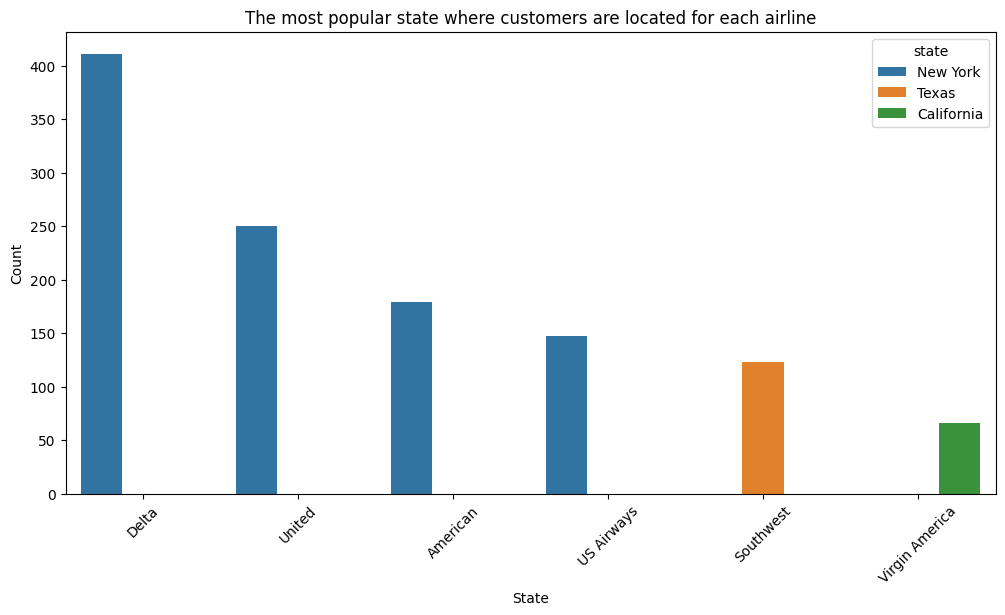

In [149]:
#filter out the state = "other"
df_task2 = df[df['state'] != 'other']

df_task2 = df_task2.drop_duplicates(subset = ['tweet_id', 'text'], keep = 'first') #Drop duplcate based on tweet_ID and text since they are retweet

#Group by the airline and state
pop_state = df_task2.groupby(['airline', 'state']).size()

pop_state_df = pop_state.reset_index(name='count') #reset index and name the column count

# Use the idxmax() function to get the most popular state for each airline
most_popular_states = pop_state_df.groupby('airline')['count'].idxmax()

# Get the corresponding states for each airline
most_popular_states_df = pop_state_df.loc[most_popular_states]
most_popular_states_df = most_popular_states_df.sort_values(by = 'count', ascending = False) #sort values by count

# Print the result
print(most_popular_states_df)

# # Create the bar chart
plt.figure(figsize=(12, 6))  # Set the figure size

# Use seaborn library for better aesthetics
sns.barplot(x='airline', y='count', hue='state', data=most_popular_states_df)

# Set labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('The most popular state where customers are located for each airline')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()



Comment: For Delta, United, American, and US Airways, the most number of customers come from New York, while, for Southwest and Virgin American, their customers come from Texas and Virgin America, respectively.

---



####**Count of Type of Sentiment**

Text(0.5, 1.0, 'Count of type for each sentiment')

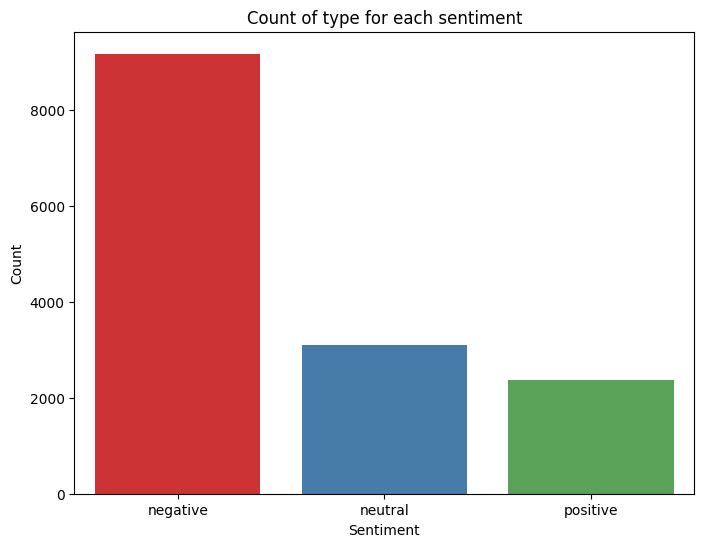

In [150]:
df = data.copy()
counttype = df.airline_sentiment.value_counts()
index = [1,2,3]
# sentimentindex = counttype.index
plt.figure(1, figsize = (8,6))
#plot using sns
sns.barplot(x = counttype.index, y= counttype.values, palette = 'Set1' )
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of type for each sentiment')

Negative comments dominate the amount of total comments in this dataset.

**Sentiment for each airlines**

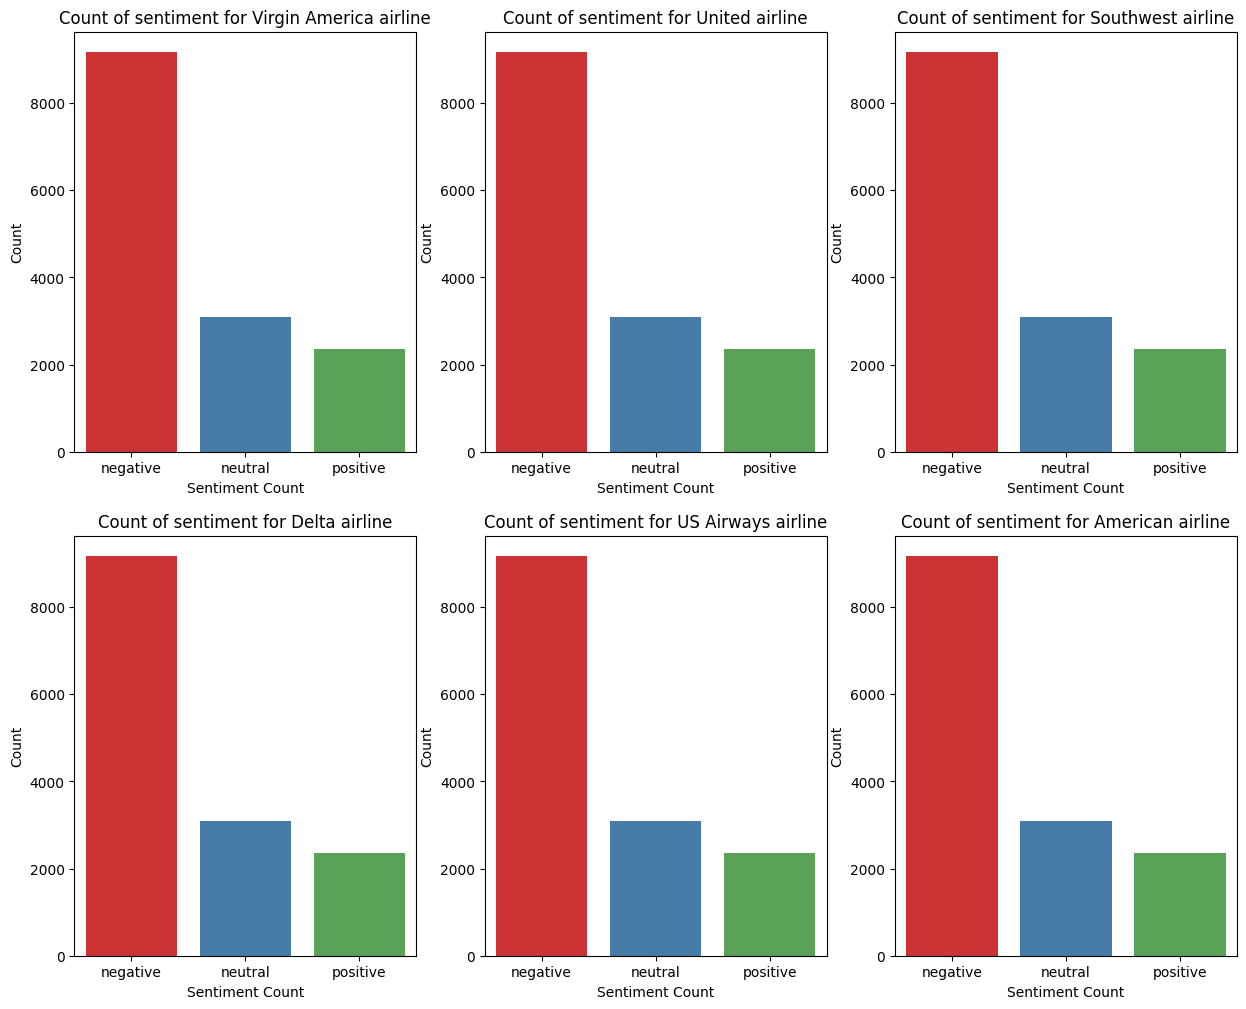

In [151]:
airlines = df['airline'].unique().tolist() #Get the list of name for airlines

#plot the figure for each airlines
plt.figure(1, figsize = (15,12))
for x in airlines:
  indices = airlines.index(x)
  plt.subplot(2,3, indices +1)
  df_new = df[df['airline'] == x]
  count = df_new['airline_sentiment'].value_counts()
  index_new = [1, 2, 3]
  sns.barplot(x = counttype.index, y= counttype.values, palette = 'Set1' )
  plt.xlabel('Sentiment Count')
  plt.ylabel('Count')
  plt.title('Count of sentiment for ' + x + " airline")

Comment: For all six airlines, the amount of negative comments dominate that of neutral and positive.

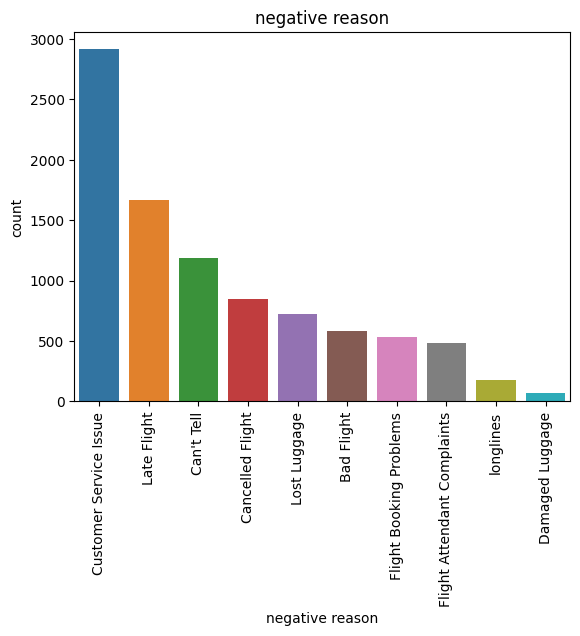

In [152]:
#Negative reason for tweet
df.columns
neg_re = df.groupby('negativereason')['tweet_id'].count().sort_values(ascending = False)
neg_re = neg_re.reset_index(name = 'count')
# neg_re.plot(kind = 'bar', figsize = (8, 6), rot = 60)
plt.figsize = (8,6)
sns.barplot(data = neg_re, x = 'negativereason', y ='count')
plt.xticks(rotation = 90)
plt.xlabel('negative reason')
plt.ylabel('count')
plt.title('negative reason')
plt.show()


Customer service is deemed to be the number 1 reason to complain, followed by "late flight" and "Can't tell". Damanged Luggage is the least reason of complain.

Having done the exploratory data analysis, we have thorough understanding of our data. In the next step, sentiment analysis will be used to analyze "text" column so that we can get more insight.

---

####**Data Process before sentiment analysis**

Before using machine learning models to predict tweet's sentiment, we need to encode the column "airline_sentiment" firstly.

In [153]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the 'airline_sentiment' column
df['airline_sentiment_encoded'] = le.fit_transform(df['airline_sentiment'])

df.head(4)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,airline_sentiment_encoded
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0


<a  id = "cell_sentiment"></a>
### <font color="red">3. Sentiment Analysis </font>  

**Aim:** To demonstrate your understanding in sentiment analysis.

 **Machine Learning Based Approach**

_Use machine learning based sentiment analysis to answer question (C)._

In [154]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import re
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Firstly, we define a function to clean the text in "text" column

In [155]:
def tweet_words(tweet):
  letters_only = re.sub("[^a-zA-Z]", " ", tweet) #only keep words
  letters_only = re.sub(r'@\w+', '', tweet) #remove the @airline_name
  words = letters_only.lower().split() #lower all the words and split them
  stops = set(stopwords.words("english"))
  meaningful_words = [w for w in words if not w in stops] #only keep word that is not in stop words.
  return(" ".join(meaningful_words))

In [156]:
#transform columns text
df['text'] = df['text'].apply(lambda x: tweet_words(x))
df['text']

0                                                    said.
1              plus added commercials experience... tacky.
2               today... must mean need take another trip!
3        really aggressive blast obnoxious "entertainme...
4                                     really big bad thing
                               ...                        
14635                  thank got different flight chicago.
14636    leaving 20 minutes late flight. warnings commu...
14637         please bring american airlines #blackberry10
14638    money, change flight, answer phones! suggestio...
14639    8 ppl need 2 know many seats next flight. plz ...
Name: text, Length: 14640, dtype: object

In [157]:
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['text'])
print('Bag of Word Matrix size: ', text_counts.shape)
print('Data in the first row:\n', text_counts[1,:])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Bag of Word Matrix size:  (14640, 13975)
Data in the first row:
   (0, 9675)	1
  (0, 1943)	1
  (0, 3795)	1
  (0, 5320)	1
  (0, 12023)	1


After running the cleaning the text column, we have total 14640 rows with 13975 attributes in the bag of word ready to use in machine learning models.

#Model construction

##Dimension Reduction:

Dimension reduction is crucial in machine learning, and we will use Univariate Selection for this case. Advantages include: less complexity, reduced storage space and computation time, improved model accuracy, faster algorithm training, quicker data visualization, and elimination of noise and redundant features. Using Univariate Selection promises to enhance overall performance and efficiency in our machine learning efforts.

Firstly, we import the package SelectKbest

In [158]:
from sklearn.feature_selection import SelectKBest

#Get the target label
Target = df['airline_sentiment_encoded']

#We will select the top 100 features
test = SelectKBest(k=200)

#Fit the function for ranking the features by score
fit = test.fit(text_counts, Target)
UnivariateFeatures = fit.transform(text_counts)
print('Reduced Data Set size:',UnivariateFeatures.shape)

Reduced Data Set size: (14640, 200)


Original: Bag of Word Matrix size:  (14640, 13349)

After select feature: (14640, 200)

After that, we split the dataset into training and testing, ratio is: 70/30

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    UnivariateFeatures, df['airline_sentiment_encoded'], test_size=0.3, random_state=1)

---

### <font color="yellow">Naive Bayes classifer:</font>  

We will use Naive Bayes classifer as one of the chosen method, reason is that this model is simple, fast, and low data requirement. Therefore, it is a good model to use as a base case. However, one might need to bear in mind its disadvantages such as Overly Simplistic Assumption.

MultinomialNB Accuracy: 0.72996
Confusion Matrix:
 [[2444  184  113]
 [ 549  315   72]
 [ 196   72  447]]
classification_report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.82      2741
           1       0.55      0.34      0.42       936
           2       0.71      0.63      0.66       715

    accuracy                           0.73      4392
   macro avg       0.68      0.62      0.64      4392
weighted avg       0.71      0.73      0.71      4392

Cohen's Kappa Score: 0.4552645870299329


<Figure size 640x480 with 0 Axes>

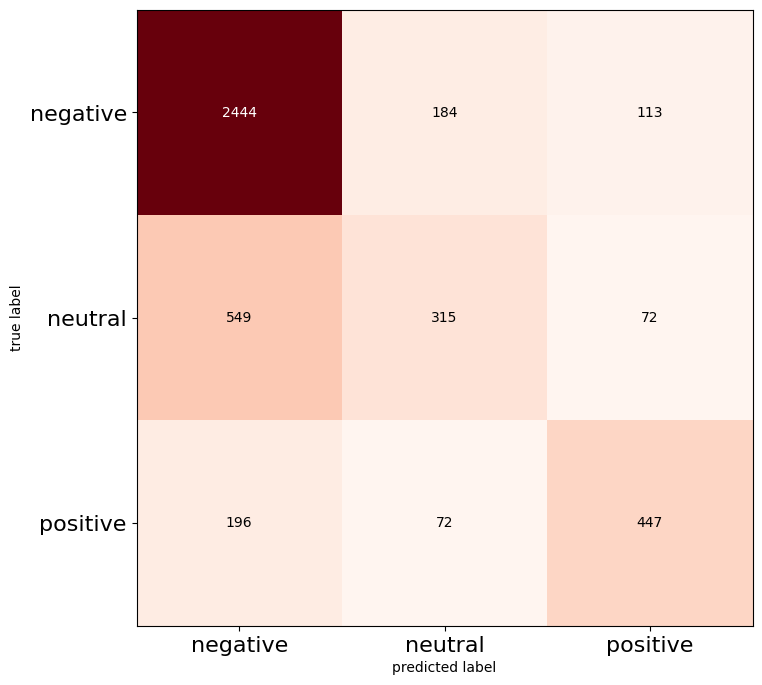

In [160]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:", round(metrics.accuracy_score(y_test, predicted),5))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, predicted))
print("classification_report:\n", metrics.classification_report(y_test, predicted))
print("Cohen's Kappa Score:", metrics.cohen_kappa_score(y_test, predicted))
plt.figure()

cm = metrics.confusion_matrix(y_test, predicted)


plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['negative', 'neutral', 'positive'], fontsize=16,color='black')
plt.yticks(range(3), ['negative', 'neutral', 'positive'], fontsize=16)

plt.show()

### <font color="yellow">SVM classifer:</font>  

SVM is the second choice of machine learning technique. The reason why I choose it is because this model can handle non-linear data well, robust to overfitting and memory efficient. However, one needs to bear in mind that this model has several disadvantages such as not handling well noisy datasets, or being sensitive to Kernel choice.

SVM Accuracy: 0.7345173042
Confusion Matrix:
 [[2512  104  125]
 [ 607  245   84]
 [ 218   28  469]]
classification_report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.83      2741
           1       0.65      0.26      0.37       936
           2       0.69      0.66      0.67       715

    accuracy                           0.73      4392
   macro avg       0.70      0.61      0.62      4392
weighted avg       0.72      0.73      0.71      4392

Cohen's Kappa Score: 0.44966102669391284


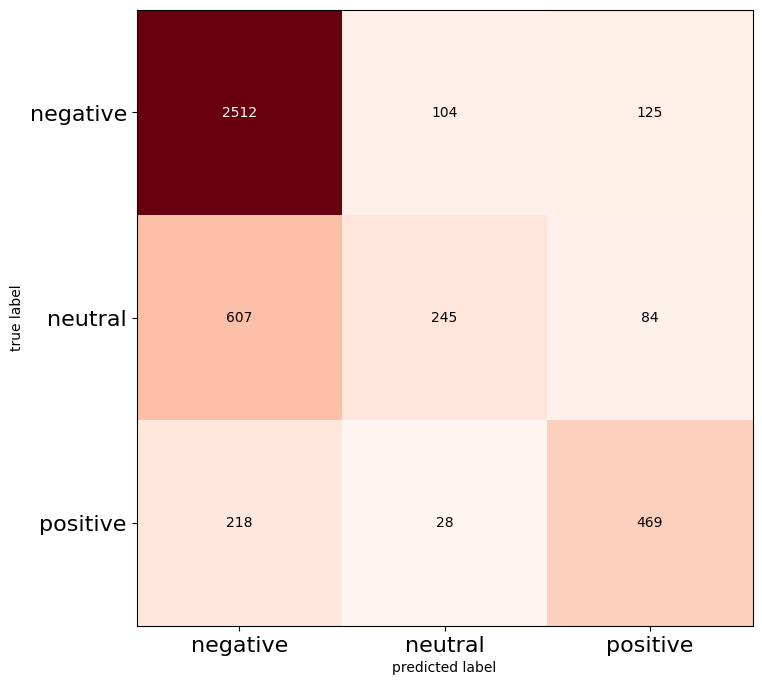

In [161]:
#training svm model with linear kernel
from sklearn.svm import SVC

model = SVC(kernel = 'linear', decision_function_shape = 'ovr', random_state = 10).fit(X_train, y_train)

#predicting
pred = model.predict(X_test)

#results
print("SVM Accuracy:", round(metrics.accuracy_score(y_test, pred),10))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, pred))
print("classification_report:\n", metrics.classification_report(y_test, pred))
print("Cohen's Kappa Score:", metrics.cohen_kappa_score(y_test, pred))

cm1 = metrics.confusion_matrix(y_test, pred)


plot_confusion_matrix(cm1, figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['negative', 'neutral', 'positive'], fontsize=16,color='black')
plt.yticks(range(3), ['negative', 'neutral', 'positive'], fontsize=16)
plt.show()

In this analysis, SVM and Multinomial Naive Bayes have been utilised to produce our targeted model. In genenral, both models are high in accuracy metrics. The precision for "negative" and "positive" values in both models are quite decent. The kappa score for both are below 0.5, indicating the model's predictions are better than chance.

Further imporvements or considerations may be needed to enhance its performance.

###**Lexicon Based Approach**

_Use lexicon based sentiment analysis to answer question (D)._

Now we are going to use Lexicon Based Approach to analysis top 3 airlines that received the most number of tweets. From the EDA, top 3 airlines are: United, US Airways, and American

We get the data for top 3 airlines

In [162]:
#Get the data for top 3 airlines
new_data = data.copy()
name_3_air = ["United", "US Airways", "American"]
df_top3 = new_data[new_data['airline'].isin(name_3_air)]
df_top3.reset_index(inplace = True)
df_top3.drop(['index'], axis = 1, inplace = True)

<ipython-input-162-02248bb1cb85>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top3.drop(['index'], axis = 1, inplace = True)


In [163]:
df_top3.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570307876897628160,positive,1.0000,NaN,NaN,United,NaN,rdowning76,NaN,0,@united thanks,NaN,2015-02-24 11:42:48 -0800,usa,NaN
1,570307847281614848,positive,1.0000,NaN,NaN,United,NaN,CoreyAStewart,NaN,0,@united Thanks for taking care of that MR!! Ha...,NaN,2015-02-24 11:42:41 -0800,"Richmond, VA",Eastern Time (US & Canada)
2,570307109704900608,negative,1.0000,Cancelled Flight,0.703,United,NaN,CoralReefer420,NaN,0,@united still no refund or word via DM. Please...,NaN,2015-02-24 11:39:45 -0800,"Bay Area, California",Alaska
3,570307026263384064,negative,1.0000,Late Flight,1.000,United,NaN,lsalazarll,NaN,0,@united Delayed due to lack of crew and now de...,NaN,2015-02-24 11:39:25 -0800,NaN,Mountain Time (US & Canada)
4,570306733010264064,positive,0.3441,NaN,0.000,United,NaN,rombaa,NaN,0,@united thanks -- we filled it out. How's our ...,NaN,2015-02-24 11:38:15 -0800,NaN,NaN


Again, we clean the text column by using a local define function.

In [164]:
def clean_tweet_forlex(tweet):
  letters_only = re.sub(r'@\w+', '', tweet) #remove the @airline_name
  return ''.join(letters_only)

In [165]:
#transform columns text
df_top3['text'] = df_top3['text'].apply(lambda x: clean_tweet_forlex(x))
df_top3.head()

<ipython-input-165-327f8183bf65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top3['text'] = df_top3['text'].apply(lambda x: clean_tweet_forlex(x))


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570307876897628160,positive,1.0000,NaN,NaN,United,NaN,rdowning76,NaN,0,thanks,NaN,2015-02-24 11:42:48 -0800,usa,NaN
1,570307847281614848,positive,1.0000,NaN,NaN,United,NaN,CoreyAStewart,NaN,0,Thanks for taking care of that MR!! Happy cus...,NaN,2015-02-24 11:42:41 -0800,"Richmond, VA",Eastern Time (US & Canada)
2,570307109704900608,negative,1.0000,Cancelled Flight,0.703,United,NaN,CoralReefer420,NaN,0,still no refund or word via DM. Please resolv...,NaN,2015-02-24 11:39:45 -0800,"Bay Area, California",Alaska
3,570307026263384064,negative,1.0000,Late Flight,1.000,United,NaN,lsalazarll,NaN,0,Delayed due to lack of crew and now delayed a...,NaN,2015-02-24 11:39:25 -0800,NaN,Mountain Time (US & Canada)
4,570306733010264064,positive,0.3441,NaN,0.000,United,NaN,rombaa,NaN,0,thanks -- we filled it out. How's our luck wi...,NaN,2015-02-24 11:38:15 -0800,NaN,NaN


In [166]:
# first, we import the relevant modules from the NLTK library
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [167]:
#Initialize an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

message_text = df_top3['text'][3]
print('Review Comment:\n', message_text)

Review Comment:
  Delayed due to lack of crew and now delayed again because there's a long line for deicing... Still need to improve service #united


In [168]:
#Estimate sentiment scores
scores = sid.polarity_scores('message_text')
for key in sorted(scores):
        print('{0}: {1} \n'.format(key, scores[key]), end='')
print('True Recommedation Label was: ', df['airline_sentiment'][3])

compound: 0.0 
neg: 0.0 
neu: 1.0 
pos: 0.0 
True Recommedation Label was:  negative


In [169]:
def get_sentiment_score(text):
  return sid.polarity_scores(text)['compound']
# df_top3['text'] = df_top3['text'].apply(str)
df_top3['SentimentScore'] = df_top3['text'].apply(get_sentiment_score)
df_top3.head(5)


<ipython-input-169-10e707e28305>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top3['SentimentScore'] = df_top3['text'].apply(get_sentiment_score)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,SentimentScore
0,570307876897628160,positive,1.0000,NaN,NaN,United,NaN,rdowning76,NaN,0,thanks,NaN,2015-02-24 11:42:48 -0800,usa,NaN,0.4404
1,570307847281614848,positive,1.0000,NaN,NaN,United,NaN,CoreyAStewart,NaN,0,Thanks for taking care of that MR!! Happy cus...,NaN,2015-02-24 11:42:41 -0800,"Richmond, VA",Eastern Time (US & Canada),0.8856
2,570307109704900608,negative,1.0000,Cancelled Flight,0.703,United,NaN,CoralReefer420,NaN,0,still no refund or word via DM. Please resolv...,NaN,2015-02-24 11:39:45 -0800,"Bay Area, California",Alaska,-0.2732
3,570307026263384064,negative,1.0000,Late Flight,1.000,United,NaN,lsalazarll,NaN,0,Delayed due to lack of crew and now delayed a...,NaN,2015-02-24 11:39:25 -0800,NaN,Mountain Time (US & Canada),-0.2960
4,570306733010264064,positive,0.3441,NaN,0.000,United,NaN,rombaa,NaN,0,thanks -- we filled it out. How's our luck wi...,NaN,2015-02-24 11:38:15 -0800,NaN,NaN,0.7399


After that, we define a function to create a new column, where compound scores >0 means positive, == 0 means neutral, and < 0 means negative, so that we can use for our model.

In [170]:
def neg_pos(scores):
  if scores > 0:
    return 'Positive'
  elif scores == 0:
    return 'Neutral'
  if scores < 0:
    return 'Negative'


In [171]:
df_top3['lexicon_sentiment_scores'] = df_top3['SentimentScore'].apply(neg_pos)

<ipython-input-171-e1556f25b886>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top3['lexicon_sentiment_scores'] = df_top3['SentimentScore'].apply(neg_pos)


In [172]:
a = df_top3.groupby(['airline', 'lexicon_sentiment_scores']).size()
a = a.reset_index(name = "count")

neg_pos_percentage = a.pivot_table(index='airline', columns='lexicon_sentiment_scores', values='count', aggfunc='sum', fill_value=0)

# Reset the index to have a clean DataFrame
neg_pos_percentage.reset_index(inplace=True)

# Rename the columns for clarity
neg_pos_percentage.columns.name = None

# Display the result
neg_pos_percentage['positive/negative'] = neg_pos_percentage['Positive'] / neg_pos_percentage['Negative']
neg_pos_percentage

,airline,Negative,Neutral,Positive,positive/negative
0,American,1091,547,1121,1.027498
1,US Airways,1215,613,1085,0.893004
2,United,1441,786,1595,1.106870


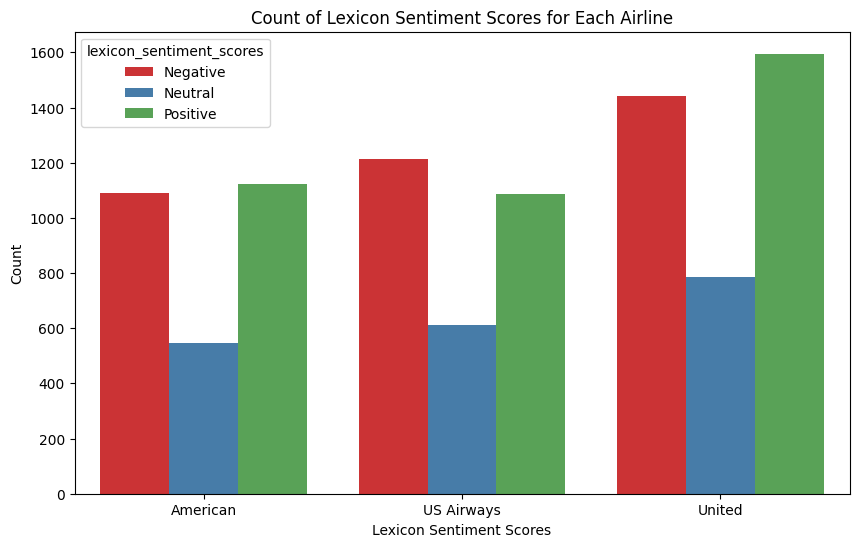

In [173]:
df_top3.head()
vi = df_top3.groupby(['airline', 'lexicon_sentiment_scores']).size()
vi = vi.reset_index(name='count')

# Set the figure size (optional)
plt.figure(figsize=(10, 6))

# Use seaborn's barplot to create the bar chart
sns.barplot(data=vi, x = 'airline', y = 'count', hue = 'lexicon_sentiment_scores', palette="Set1")

# Set labels and title
plt.xlabel('Lexicon Sentiment Scores')
plt.ylabel('Count')
plt.title('Count of Lexicon Sentiment Scores for Each Airline')

# Show the plot
plt.show()



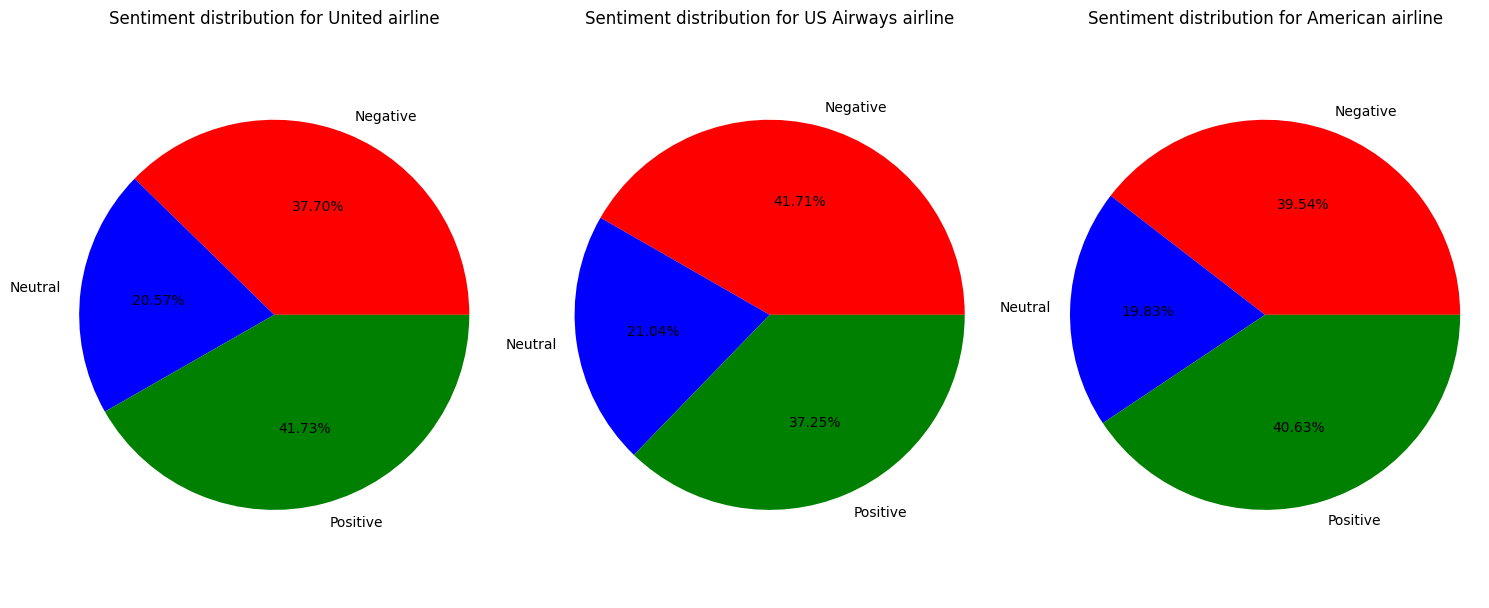

In [174]:
top3 = df_top3.airline.unique()
# Define colors for the pie chart
sentiment_color = ['red', 'blue', 'green']

plt.figure(figsize=(15, 12))

for idx, airline in enumerate(top3, 1):
    plt.subplot(2, 3, idx)

    # Filter the DataFrame for the current airline
    df_new = df_top3[df_top3['airline'] == airline]

    # Count sentiment occurrences for the current airline
    count = df_new['lexicon_sentiment_scores'].value_counts()

    # Sort the count Series by the index
    count = count.sort_index()

    # Plot the pie chart using Seaborn
    plt.pie(x=count, labels=count.index,colors = sentiment_color,  autopct='%1.2f%%')
    plt.axis('equal')
    plt.title('Sentiment distribution for ' + airline + ' airline')

plt.tight_layout()
plt.show()

Conclusion: By using Lexicon Based Approach to apply for United Airline, US Airways airline, and American airline, we have identified that American airline and United are the brands that have the proportion of positive comments higher than negative. Regarding the percentage of negative comments, United Airline has the higher figure than American Airline. Among those three, United has the highest proportion of positive over negative comments, which is ~1.11.

<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling

**Aim:** To demonstrate your understanding in topic modeling.

_Use text-processing techniques to process and prepare textual data for topic modelling._

_Use LDA to explore topics discussed in the text reviews._

_Carry out experiments and demonstrate how an appropriate topic number is determined for your model._

_Interpret the discovered topics and answer question (E)._


In [175]:
#make a copy from original data
df = data.copy()
df['text']

#filter out the negative comment online:
df = df[df.airline_sentiment == 'negative']
df.reset_index(drop = True, inplace = True) #reset index
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
1,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
2,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
3,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
4,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)


In [176]:
from nltk.stem import PorterStemmer #Stemming Package
import re  #Regular expression operation package

porter = PorterStemmer()


documents = df['text']
Cleaned_doc = []
for r in range(len(documents)):
    review = documents[r]
    try:
        #Remove @airlinename
        review = re.sub(r'@\w+', '', review)
        # removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review)
        # make all text lowercase
        review = review.lower()
        # apply tokenization
        Tokens = review.split()
        # removing short words
        Filtered_token = [w for w in Tokens if len(w)>3]
        review = ' '.join(Filtered_token)
    except:
        continue
    #Save cleaned text
    Cleaned_doc.append(review)

Next, we need to remove the *_stop-words_* from the text data.

In [195]:
stop_words = stopwords.words('english')

# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item)

To identify which are the common problems for airline in tweet comment, we need to extract nouns from those comments.

In [178]:
#define a function to keep nouns only
def extract_nouns(text):
    # Tokenize the text into individual words
    words = nltk.word_tokenize(text)

    # Perform part-of-speech tagging
    tagged_words = nltk.pos_tag(words)

    # Extract nouns (NN, NNS, NNP, NNPS)
    nouns = [word for word, pos in tagged_words if pos.startswith('NN')]

    return ' '.join(nouns)


# Assuming 'df' is your DataFrame and 'text_column' is the column containing text
Cleaned_doc = [extract_nouns(text) for text in Cleaned_doc]

Next step is that we use Term Frequency representation of the document for LDA

In [179]:
# Fit and transform the processed titles
count_vectorizer = CountVectorizer()

count_data = count_vectorizer.fit_transform(Cleaned_doc)
count_data

<9178x5018 sparse matrix of type '<class 'numpy.int64'>'
	with 37569 stored elements in Compressed Sparse Row format>

Next is to visualize the most common words in the comment section

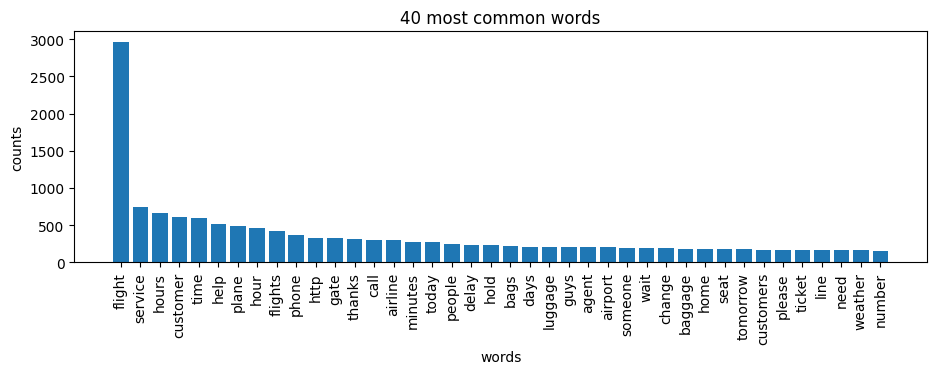

In [180]:
terms = count_vectorizer.get_feature_names_out()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:40] #Take the top 40 words

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))

plt.figure(2, figsize=(11, 3))
plt.subplot(title='40 most common words')
plt.bar(words, counts)
plt.xticks(x_pos, words, rotation=90)
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

It is noticable that word "flight" appears significantly higher than others. Next step, we will remove highly frequent and infrequent words since they will not make a huge impact on our analysis.

In [181]:
len(total_counts)

5018

In [182]:
#Remove highly frequent (Greater than 20%) and infrequent words (less than 1%)
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 1000 and total_counts[t] > 50:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex]
ReducedCount

Number of Terms Remained:  118


<9178x118 sparse matrix of type '<class 'numpy.int64'>'
	with 17995 stored elements in Compressed Sparse Row format>

<a id = "cell_Experiment"></a>
###  Experiment with Topic Numbers

We construct multiple LDA modles with varied numbers of topics and evaluate their coherence score.

####Choosing the best parameter for topics

In [183]:
#This only needs to run once to install Gensim package
#Make sure that your computer is connected to the Internet
!pip install Cython
!pip install gensim

In [184]:
Cleaned_doc_new = []
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
             each_item.append(t)
    Cleaned_doc_new.append(each_item)

In [185]:
import gensim.corpora as corpora

# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_new)

In [186]:
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint#

Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_new]

#Train model using bag of word reprentation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                       id2word=id2word,
                                       num_topics=7,
                                       random_state=2023)

#Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

[(0,
  '0.127*"hours" + 0.092*"phone" + 0.076*"call" + 0.060*"guys" + '
  '0.058*"weather" + 0.047*"number" + 0.039*"airline" + 0.038*"reservation" + '
  '0.033*"email" + 0.032*"response"'),
 (1,
  '0.162*"plane" + 0.101*"gate" + 0.070*"bags" + 0.058*"baggage" + '
  '0.057*"work" + 0.049*"anything" + 0.043*"customers" + 0.041*"yesterday" + '
  '0.041*"issue" + 0.031*"delays"'),
 (2,
  '0.102*"http" + 0.094*"minutes" + 0.094*"flights" + 0.063*"today" + '
  '0.054*"night" + 0.045*"book" + 0.044*"passengers" + 0.041*"check" + '
  '0.039*"please" + 0.035*"connection"'),
 (3,
  '0.087*"people" + 0.080*"luggage" + 0.071*"system" + 0.068*"line" + '
  '0.057*"problems" + 0.053*"seats" + 0.052*"anyone" + 0.041*"airport" + '
  '0.040*"experience" + 0.039*"trip"'),
 (4,
  '0.199*"help" + 0.095*"agent" + 0.091*"hour" + 0.073*"home" + 0.065*"delay" '
  '+ 0.065*"seat" + 0.033*"money" + 0.032*"call" + 0.032*"gate" + '
  '0.031*"time"'),
 (5,
  '0.209*"service" + 0.175*"customer" + 0.132*"time" + 0.0

Compute topic coherence sore:

In [187]:
from gensim.models import CoherenceModel

# Compute Coherence Score. Note: that CoherenceModel require
# text input format (Cleaned_doc_new) instead of bag of word
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=Cleaned_doc_new,
                                     dictionary=id2word,
                                     coherence='c_v')


coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.2787845538462635


In [188]:
#Evaluation models with topics numbers from 2 to 10
Topics = list(range(2,20,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=2023)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=Cleaned_doc_new,
                                         dictionary=id2word,
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores
    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Topic Number: 2 -- Coherence: 0.19710385430689562


Topic Number: 3 -- Coherence: 0.20121643088079022


Topic Number: 4 -- Coherence: 0.23590257143418725


Topic Number: 5 -- Coherence: 0.27288267174703673


Topic Number: 6 -- Coherence: 0.27872203445906224


Topic Number: 7 -- Coherence: 0.2787845538462635


Topic Number: 8 -- Coherence: 0.28827397656124853


Topic Number: 9 -- Coherence: 0.29408238901349254


Topic Number: 10 -- Coherence: 0.2825922031719479


Topic Number: 11 -- Coherence: 0.2944860676484047


Topic Number: 12 -- Coherence: 0.2824414940056396


Topic Number: 13 -- Coherence: 0.2875354210177106


Topic Number: 14 -- Coherence: 0.2755844951731194


Topic Number: 15 -- Coherence: 0.2819862579064435


Topic Number: 16 -- Coherence: 0.2780634774352816


Topic Number: 17 -- Coherence: 0.26661082036837325


Topic Number: 18 -- Coherence: 0.2686606978950125
Topic Number: 19 -- Coherence: 0.2777109318179117


Plot the coherence scores for the ease of interpretation. The desired topic number is the one that produce highest coherence score.

Text(0, 0.5, 'Coherence')

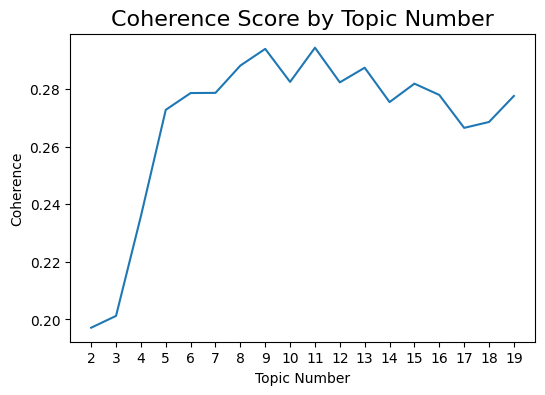

In [189]:
from matplotlib import pyplot
pyplot.figure(figsize=(6,4))
pyplot.plot(coherence_scores)
pyplot.xticks(range(0,len(Topics)),Topics)
pyplot.title('Coherence Score by Topic Number', fontsize=16)
pyplot.xlabel('Topic Number')
pyplot.ylabel('Coherence')

We have identified several diverse topics with high coherence scores. As a first step, we will explore seven of these topics to determine their practicality and relevance.

In [190]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Tweak the two parameters below
number_topics = 7

lda = LDA(n_components=number_topics, n_jobs=-1, random_state=2023)
lda.fit(ReducedCount)
#Trained LDA model
# lda.components_

LatentDirichletAllocation(n_components=7, n_jobs=-1, random_state=2023)

In [191]:
#Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))


Topic #0:
hours : 0.210
time : 0.191
hold : 0.075
airport : 0.064
change : 0.045

Topic #1:
help : 0.142
http : 0.129
bags : 0.085
luggage : 0.081
seat : 0.070

Topic #2:
flights : 0.191
guys : 0.094
someone : 0.090
tomorrow : 0.080
customers : 0.077

Topic #3:
hour : 0.109
call : 0.098
thanks : 0.072
days : 0.068
home : 0.059

Topic #4:
plane : 0.202
gate : 0.123
need : 0.068
check : 0.058
agents : 0.057

Topic #5:
service : 0.273
customer : 0.224
delay : 0.088
baggage : 0.066
hour : 0.045

Topic #6:
phone : 0.144
today : 0.107
people : 0.097
minutes : 0.076
agent : 0.073


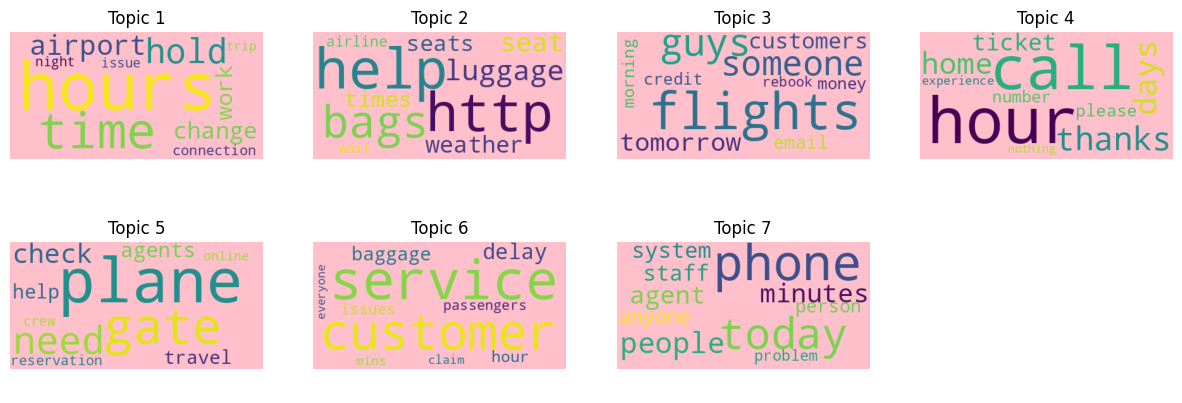

In [192]:
from matplotlib import pyplot
from wordcloud import WordCloud
import math
rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = pyplot.subplots(rows, 4, figsize=(15,2.5*rows))
[axi.set_axis_off() for axi in ax.ravel()]
for topic_idx, topic in enumerate(Word_Topics_Pro):
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
    # convert to dictionary type - keep top 10 words
    Word_Frequency = dict(count_dict[0:10])
    # generate word cloud
    wordcloud = WordCloud(background_color="pink").generate_from_frequencies(Word_Frequency)
    # visualize word cloud in figure
    subfig_Row = math.floor(topic_idx/4)
    subfig_Col = math.ceil(topic_idx%4)
    ax[subfig_Row,subfig_Col].imshow(wordcloud)
    ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1))
plt.show()




**Topic #1:**

**Potential problem:** Waiting time and delays at Airports

**Topic #2:**

**Potential problems:** Issues with baggage and seating

**Topic #3:**

**Potential problems:** Flight-related inquiries and customer communication

**Topic #4:**

**Potential problem:** Delayed or lengthy Customer Support

**Topic #5:**

**Potential problems:** Gate and Check-in problems

**Topic #6:**

**Potential problem:** Customer Service and Baggage Delay

**Topic #7:**

**Potential problems:** Phone-based Customer Service and Waiting time

However, further domain-specific knowledge and analysis of the actual tweet content would be required for a more precise understanding of the potential problems mentioned in the dataset.

Visualize the topic distribution using bar chart

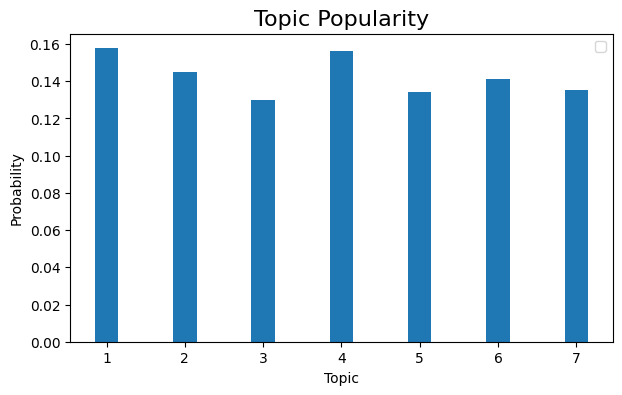

In [193]:
#Compute topic distribution for each document
TopicDis_Doc = lda.transform(ReducedCount)

#Compute overall topic distribution for all each documents
Overall_Topic_Dis = sum(TopicDis_Doc)/sum(sum(TopicDis_Doc))
# Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

#Visualize topic distributions of review groups
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Popularity', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')
pyplot.bar(Bar_index, Overall_Topic_Dis.tolist(), 0.3)
pyplot.xticks(Bar_index, Bar_index)
pyplot.legend()
pyplot.show();

It seems that the popularity of all topic are roughly the same. However, the topic 4 is the most popular one, followed closely by topic 1.

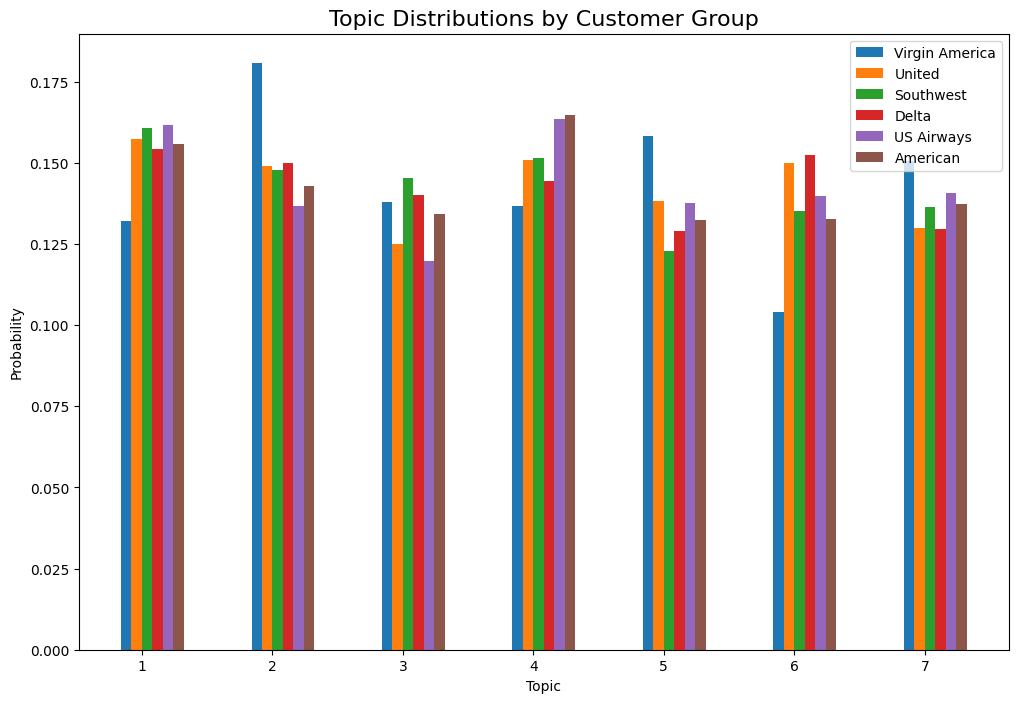

In [194]:
airline_name = df['airline'].unique().tolist() #get airline name

Group_Prob = []
for i in range(len(airline_name)):
    ReducedTerm_Selected = ReducedCount[np.where(df['airline'] == airline_name[i])]
    TopicDis_Doc = lda.transform(ReducedTerm_Selected)
    Group_Prob.append(sum(TopicDis_Doc)/sum(sum(TopicDis_Doc)))


Group_Prob
#Create a new figure
pyplot.figure(figsize=(12,8))
pyplot.title('Topic Distributions by Customer Group', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')

width = 0.08

for i in range(len(airline_name)):
    pyplot.bar(Bar_index + i*width, Group_Prob[i].tolist(), width,  label=airline_name[i])

pyplot.xticks(Bar_index + 1.5*width, Bar_index)
pyplot.legend()
pyplot.show();

Interestingly enough, Virgin American airline stays at the top 1 for topic 2, 3, 5, 7.

For topic 1 and 6, Delta airline seems to face this issue more often than others.

For topic 4 and 8, American Airline locates at top 1.



---

<a id = "cell_Practicalimplication"></a>
### 5. Practical Implication

After a thorough analysis Twitter Data about different airline brand, they can consider these following implications:

1. Brand Building on Twitter: Airlines should focus on building their brand presence on Twitter, taking into account the preferences and interests of customers from different states. Tailoring their Twitter strategies to resonate with customers in specific regions can lead to higher engagement and brand loyalty.

2. Addressing Customer Service Issues: The disproportionately high number of customer service issues reported by passengers warrants immediate attention from airlines. A thorough investigation into the customer service department can help identify and address underlying problems, ensuring better customer experiences.

3. Improving Model Performance: While SVM and Multinomial Naive Bayes models demonstrated high accuracy, their kappa scores falling below 0.5 indicate room for improvement. Airlines should work on enhancing model performance to make more reliable predictions.

4. Positive Comments Analysis: Airlines should take note of the negative comments identified through the Lexicon Based Approach. Understanding why US Airways has a higher proportion of negative comments and addressing any potential issues in negative comments can help enhance overall customer satisfaction for all airlines.

5. Targeted Improvements: Topic modelling results highlight specific areas each airline can focus on to improve customer satisfaction. Virgin America should address luggage management, online reservations, and agent staff training. Delta should work on time management, customer service, and baggage handling. American should enhance customer service via phone communication.

By implementing these practical implications, airlines can effectively enhance their customer experience, strengthen their brand reputation, and drive customer loyalty.


### References:
- Hunter, J., Dale, D., Firing, E., Droettboom, M. & Matplotlib development team (2012). Pyplot Tutorial, Matplotlib, https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html
- Zoë Wilkinson Saldaña, "Sentiment Analysis for Exploratory Data Analysis," The Programming Historian 7 (2018), https://programminghistorian.org/en/lessons/sentiment-analysis.
- Joshi, P. (2018). Text Mining 101: A Stepwise Introduction to Topic Modeling using Latent Semantic Analysis (using Python) https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/
- Kapadia, S. (2015). Topic Modeling in Python: Latent Dirichlet Allocation (LDA), https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
- Kapadia, S. (2019). Evaluate Topic Models: Latent Dirichlet Allocation (LDA), https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
- Li, S. (2019). A Complete Exploratory Data Analysis and Visualization for Text Data, towardsdatascience.com, https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
- Machinelearningplus. LDA in Python – How to grid search best topic models? https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/
- Machinelearningplus. Topic Modeling with Gensim (Python), https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
- Navlani, A. (2019). Text Analytics for Beginners using NLTK, datacamp.com, https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
- Prabhakaran, S. (n.d.). LDA in Python – How to grid search best topic models? https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/